In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Выполним задание первой части, сохраним нужный датафрейм в переменную data. ###

#### Выведем первые 20 строк, для первоначального осмотра данных. ####
#### И соберем основную информацию используя метод Info(). ####

In [7]:
data = pd.read_csv(r'C:\Users\kiril\My Projects\dataframe\project_1.csv') 
display(data.head(20))
#используем display, так как он больше подходит для работы в Jupyter Notabook.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


 _С первого взгляда сразу видны некорректные значения в столбце days_employed: отрицательного стажа быть не может. Нет общего регистра в столбце Education, а также есть пропуски данных в столбце days_employed_

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


_Сбор общей информации о датафрейме помогает нам увидеть пропуски в данных в столбцах days_employed и total_income. Также не совсем подходящий формат у столбца total_income: вряд ли кто-то получает зарплату с копейками, поэтому я изменю этот формат на int64, целочисленные значения._

_С первым шагом работы я закончил, перехожу ко второму шагу_ 

_Выполню вывод количества пропущенных значений_

In [10]:
missing_values = data.isnull().sum()
missing_values

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

_Вывели сумму пропусков в столбцах_

_Обрабатываем пропуски в total_income. Данный столбец содержит информацию о зарплатах, поэтому мы можем заполнить его медианным значением, сгруппировав клиентов по столбцу income_type или типу занятости. Это поможет более корректно обработать пропуски._

In [15]:
for z in data['income_type'].unique():
    condition = (data['income_type'] == z) & (data['total_income'].isna())
    data.loc[condition, 'total_income'] = data.loc[data['income_type'] == z, 'total_income'].median()

In [16]:
data['total_income'].isnull().sum()

0

_Я обработал пропуски в столбце total_income. Пропуски были заполнены медианным значением, так как оно более устойчиво к выбросам и аномалиям в данных_

_Следующая задача — разобраться с аномалиями в столбце days_employed. Аномалия в данном столбце представлена отрицательным стажем работы. Можно предположить, что это была опечатка человека, который заполнял форму, поэтому просто уберем отрицательные значения_

In [19]:
data['days_employed'] = data['days_employed'].abs()

In [23]:
data['days_employed']

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64

_Аномалии устранены_

_Выведем на экран медианные значения каждого типа занятости_

In [28]:
median_days = data.groupby('income_type')['days_employed'].median()
median_days
    
    
    

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

_После вывода на экран мы можем увидеть аномально большие значения у безработных и пенсионеров, все остальные значения в норме_

_Выведем на экран все уникальные значения в столбце children_

In [29]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

_После запроса на вывод уникальных значений, мы можем увидеть аномалии такие как: -1,20. Я думаю что мы можем удалить строки которые содержат данные значения, так как исправить их мы не можем_ 

In [31]:
for index, row in data.iterrows():
    if row['children'] == -1 or row['children'] == 20:
        data.drop(index, inplace=True)

In [32]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

_Аномалии успешно удалены_

_Теперь вернёмя к столбцу days_employed и заполним пропущенные значения медианными значениями по каждому типу занятости_

In [33]:
for z in data['income_type'].unique():
    condition = (data['income_type'] == z) & (data['days_employed'].isna())
    data.loc[condition, 'days_employed'] = data.loc[data['income_type'] == z, 'days_employed'].median()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  float64
 11  purpose           21402 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


_Пропуски заполнены, осталось изменить формат данных в total_income и найти возможные дубликаты в столбце education_

In [43]:
data['total_income'] = data['total_income'].astype('int64')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  int64  
 11  purpose           21402 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


_Формат успешно изменён_

In [48]:
data['education'].unique()
#Дупликаты действительно есть и они связаны с ошибкой в регистре, сейчас приведу всё к единому регистру"

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [51]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

_Дубликаты обработаны и больше нас не побеспокоят_

_Теперь задача создать новый столбец и дать каждому клиенту оценку в зависимости от его дохода_

In [53]:
def total_income(income):
    if income <= 30000:
        return 'E'
    if income >= 30001 and income <= 50000:
        return 'D'
    elif income >= 50001 and income <=200000:
        return 'C'
    elif income >=200001 and income <= 1000000:
        return 'B'
    else:
        return 'A'


In [54]:
data['total_income_category'] = data['total_income'].apply(total_income)

In [55]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


_Добавление нового столбца с оценкой дохода прошло успешно, теперь можно более наглядно видеть платежеспособность клиента_

In [56]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

_Большое количество одинаковых целей, но записанных по-разному, моя задача — разбить все запросы кредита на 4 вида_

In [57]:
def purpose(uniq_purpose):
    uniq_purpose = uniq_purpose.lower()  # Преобразуем строку в нижний регистр для унификации сравнения
    if "жиль" in uniq_purpose or "недвижимост" in uniq_purpose:
        return 'операции с недвижимостью'
    elif "автомобил" in uniq_purpose:
        return 'операции с автомобилем'
    elif "образован" in uniq_purpose:
        return 'операции с образованием'
    elif "свадьб" in uniq_purpose:
        return 'операции на свадьбу'
    else:
        return 'другое'

In [59]:
data['purpose_category'] = data['purpose'].apply(purpose)

In [63]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,операции с образованием
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,операции на свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


_Успешно добавили новые категории для цели оформления кредита_

_Таблица полностью обработана: удалены пропуски, исправлен формат, исправлены дубликаты, созданы новые категориальные столбцы для будущего анализа и построения графиков._ 

_Для дополнительной информативности и упрощения ответов на вопросы, построим некоторые графики_

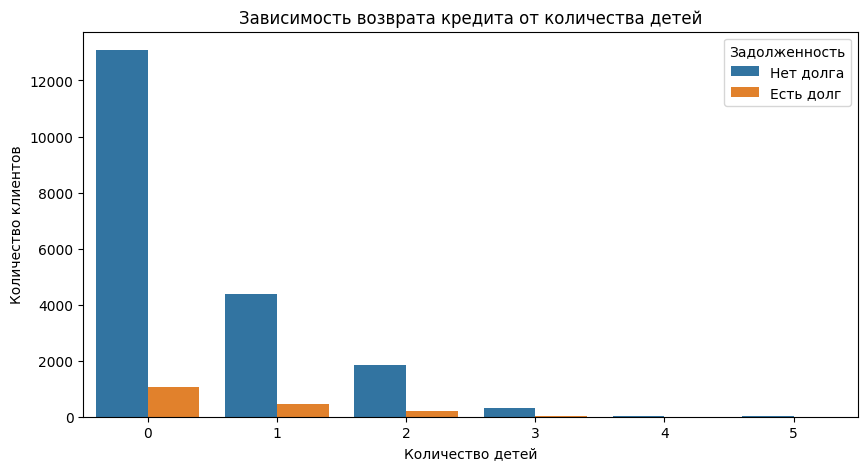

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(x='children', hue='debt', data=data)
plt.title('Зависимость возврата кредита от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество клиентов')
plt.legend(title='Задолженность', labels=['Нет долга', 'Есть долг'])
plt.show()

_Исходя из данного графика, можно сказать, что клиентов, у которых нет детей, значительно больше, так же, как и количество должников среди них. Если рассмотреть клиентов с одним и более детьми, то количество должников среди них меньше, но и общее количество таких клиентов также меньше, чем клиентов без детей. Поэтому, мне кажется, что количество детей не имеет большой зависимости с возвратом кредита в срок_ 

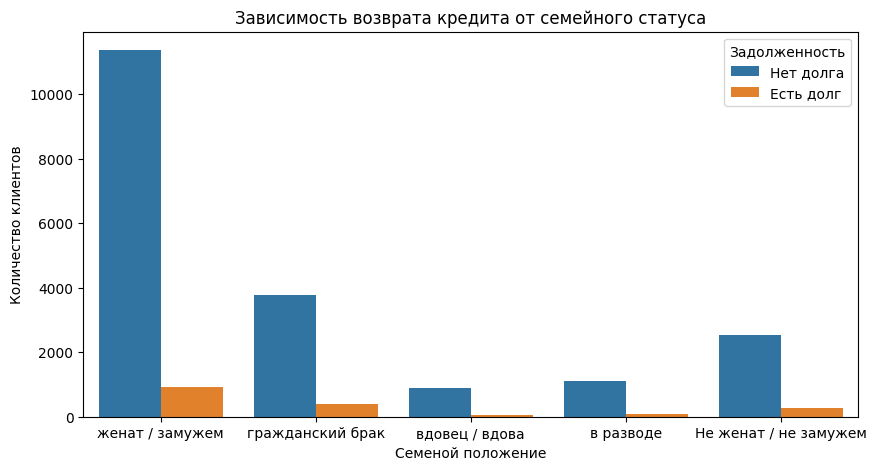

In [81]:
plt.figure(figsize=(10, 5))
sns.countplot(x='family_status', hue='debt', data=data)
plt.title('Зависимость возврата кредита от семейного статуса')
plt.xlabel('Семеной положение')
plt.ylabel('Количество клиентов')
plt.legend(title='Задолженность', labels=['Нет долга', 'Есть долг'])
plt.show()

_Данный график показывает, что большинство клиентов имеют семью. Также клиенты, имеющие семью, чаще становятся должниками, но, по моему мнению, это связано просто с большим количеством данных по этим клиентам. Если рассмотреть отдельно клиентов, не состоящих в отношениях, то количество должников среди них приближается к количеству должников среди клиентов, живущих в гражданском браке, хотя общее число клиентов в гражданском браке почти в 1,5 раза больше, чем у людей без отношений. Наименьшее количество должников наблюдается среди клиентов, потерявших вторую половину или разведенных_ 

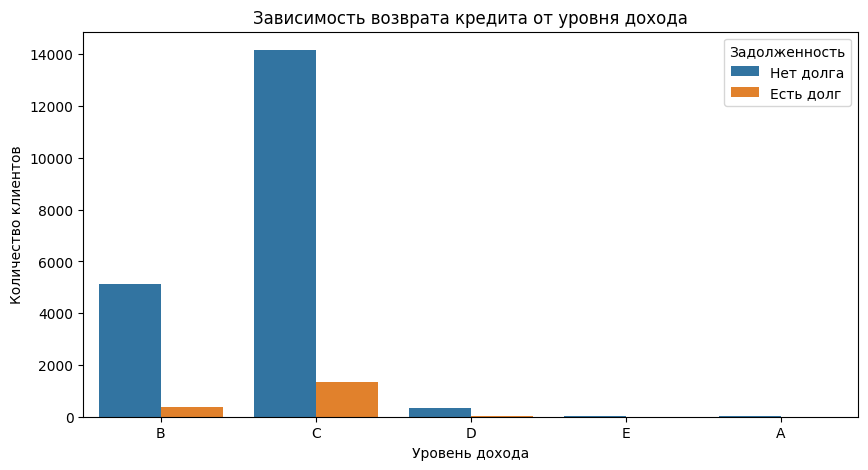

In [83]:
plt.figure(figsize=(10, 5))
sns.countplot(x='total_income_category', hue='debt', data=data)
plt.title('Зависимость возврата кредита от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество клиентов')
plt.legend(title='Задолженность', labels=['Нет долга', 'Есть долг'])
plt.show()

_Рассмотрев график, сравнивающий возврат долга по кредиту с уровнем дохода, можно сделать следующие выводы: в категории А — клиенты со сверхвысоким доходом, и в категории Е — клиенты с минимальным доходом, подали наименьшее количество заявок на кредит. Вероятно, что категория Е включает студентов, которым пока не требуются кредиты, тогда как люди из категории А, обладая сверхприбылями, вероятно, используют организации для кредитных операций вместо личных займов. Большинство клиентов принадлежит категории С, насчитывая свыше 13,000 человек, из которых около 2000 — должники, что составляет приблизительно 15%. В категории В насчитывается около 5000 человек, среди которых менее 500 — должники, что составляет менее 10%_

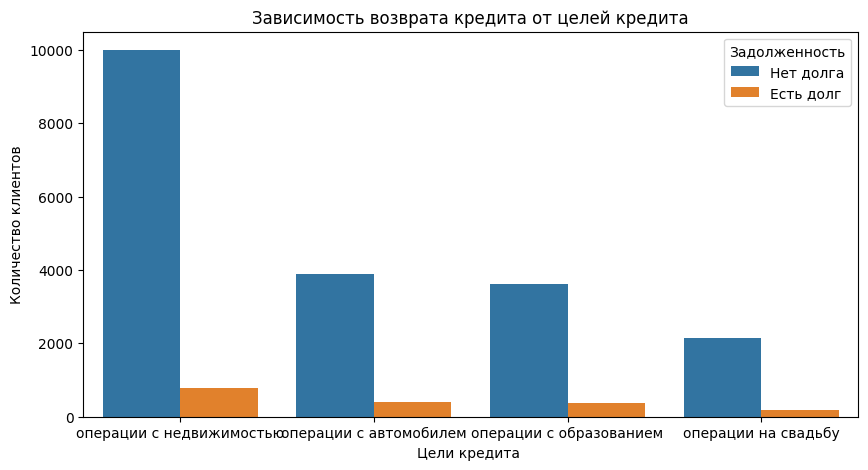

In [85]:
plt.figure(figsize=(10, 5))
sns.countplot(x='purpose_category', hue='debt', data=data)
plt.title('Зависимость возврата кредита от целей кредита')
plt.xlabel('Цели кредита ')
plt.ylabel('Количество клиентов')
plt.legend(title='Задолженность', labels=['Нет долга', 'Есть долг'])
plt.show()

_Наибольшее количество клиентов брали кредит для операций с недвижимостью, среди которых примерно 10% стали должниками. Наименьшее количество клиентов, около 2000 человек, брали кредиты для свадебных торжеств, среди них также около 10% оказались должниками. При внимательном рассмотрении оставшихся категорий, можно заметить, что доля должников везде составляет примерно одинаковые 10%. Поэтому эти данные не стоит использовать как основание для принятия решений._